In [106]:
import numpy as np
from keras.datasets import mnist
from Model import Model
import pickle

import matplotlib.pyplot as plt

In [2]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
#Checking distribution of targets in training data
np.unique(train_Y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

#### Selecting subset of 3 classes

In [4]:
def filterData(x, y, classes):
    x_filt = []
    y_filt = []
    for i in range(0, len(y)):
        if y[i] in classes:
            y_filt.append(y[i])
            x_filt.append(x[i])
    return np.array(x_filt), np.array(y_filt)

In [5]:
classes = [0, 1, 2]
train_X, train_Y = filterData(train_X, train_Y, classes)
test_X, test_Y = filterData(test_X, test_Y, classes)
testImages = test_X

#### Normalize the features

In [6]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

#### Splitting training set into training and validation sets

In [7]:
val_X = train_X[:4500]
train_X = train_X[4500:]
val_Y = train_Y[:4500]
train_Y = train_Y[4500:]

In [8]:
train_X.shape

(14123, 28, 28)

In [9]:
train_Y.shape

(14123,)

In [10]:
val_X.shape

(4500, 28, 28)

In [11]:
val_Y.shape

(4500,)

#### Vectorizing images

In [12]:
def vectorizeImages(imageData):
    return imageData.reshape(imageData.shape[0], np.prod(imageData.shape[1:]))

In [13]:
train_X = vectorizeImages(train_X)
train_X.shape

(14123, 784)

In [14]:
val_X = vectorizeImages(val_X)
val_X.shape

(4500, 784)

In [15]:
test_X = vectorizeImages(test_X)
test_X.shape

(3147, 784)

#### Encoding target values

In [16]:
def getOneHotEncoding(y):
    res=[]
    uniqY = np.unique(y)
    for i in y:
        v = np.zeros(len(uniqY))
        ind = np.where(uniqY == i)[0][0]
        v[ind] = 1
        res.append(v)
    return np.array(res)

In [17]:
train_Y = getOneHotEncoding(train_Y)
train_Y.shape

(14123, 3)

In [18]:
val_Y = getOneHotEncoding(val_Y)
val_Y.shape

(4500, 3)

In [19]:
testlabels = test_Y
test_Y = getOneHotEncoding(test_Y)
test_Y.shape

(3147, 3)

#### Run this to load model from json file

In [110]:
with open("task2MNISTmodel.txt", "rb") as fp:   # Unpickling
    model = pickle.load(fp)
print("Loaded model from disk")

Loaded model from disk


#### Build Neural Network

In [99]:
model = Model()
model.build(train_X.shape[1],train_Y.shape[1],[64,16])

In [100]:
lr = 0.001
epochs = 50
decay = lr/epochs
training=model.fit(train_X,train_Y,val_X,val_Y,lr,epochs, decay)

Epoch: 0
{'Training_Loss': 1.2081489888494168, 'Training_Accuracy': 39.59, 'Validation_Loss': 1.2260485487236217, 'Validation_Accuracy': 37.69}
Epoch: 1
{'Training_Loss': 1.0336857723831563, 'Training_Accuracy': 47.07, 'Validation_Loss': 1.0372126669185149, 'Validation_Accuracy': 45.78}
Epoch: 2
{'Training_Loss': 0.9450512994402772, 'Training_Accuracy': 54.82, 'Validation_Loss': 0.9417632090392439, 'Validation_Accuracy': 53.47}
Epoch: 3
{'Training_Loss': 0.8933044892994617, 'Training_Accuracy': 63.31, 'Validation_Loss': 0.8865037055098522, 'Validation_Accuracy': 63.93}
Epoch: 4
{'Training_Loss': 0.861166565525899, 'Training_Accuracy': 66.15, 'Validation_Loss': 0.8524255206655792, 'Validation_Accuracy': 66.69}
Epoch: 5
{'Training_Loss': 0.8404197746791257, 'Training_Accuracy': 67.37, 'Validation_Loss': 0.8305263995892, 'Validation_Accuracy': 68.33}
Epoch: 6
{'Training_Loss': 0.8266659596887733, 'Training_Accuracy': 68.17, 'Validation_Loss': 0.8160409722755929, 'Validation_Accuracy': 68.

In [107]:
with open("task2MNISTmodel.txt", "wb") as fp:   #Pickling
    pickle.dump(model, fp)
print("Saved model to disk")

Saved model to disk


#### Plotting the training and Validation loss as function of epochs

In [101]:
val_loss = training['Validation_Loss']
val_accuracy = training['Validation_Accuracy']
loss = training['Training_Loss']
accuracy = training['Training_Accuracy']
epochs = range(1, len(accuracy)+1)

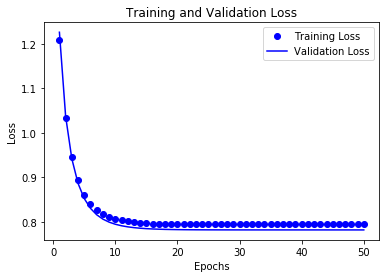

In [103]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting the training and Validation accuracy as function of epochs

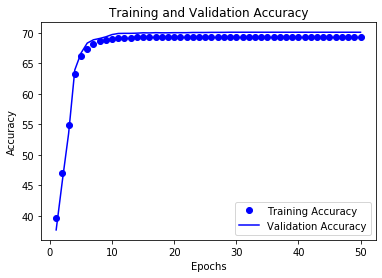

In [104]:
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [97]:
results = model.evaluateModel(test_X, test_Y)
print(results)

(0.8257160612858088, 66.03)


#### Comparing the performance with a random classifier

In [98]:
testlabels_copy = np.copy(testlabels)
np.random.shuffle(testlabels)
hits_array = np.array(testlabels) == np.array(testlabels_copy)
print(np.sum(hits_array)/len(test_Y))


0.330791229742612
